# **convex hull**

# **The convex hull of a shape is the tightest boundary that wraps around it, like putting a rubber band around the outer edges of the shape.**

In computer vision and image processing, finding the convex hull is often useful for analyzing shapes, especially for:

**Shape Simplification:**It reduces a complex shape to its outermost boundary.
    
**Shape Comparison:** Comparing convex hulls of shapes can help in recognizing and matching them.
    
**Object Detection and Analysis:** Convex hulls can help define the overall boundary of objects, making it easier to count or categorize them.

# **Example in Your Code**

In your code:

The contour of the shape (like a hand) is detected first.
The convex hull then draws the outermost boundary around this shape.

This boundary is the "convex hull" which can ignore finer details (like fingers) and shows just the outermost "convex" shape of the hand.

# **find convexhall**

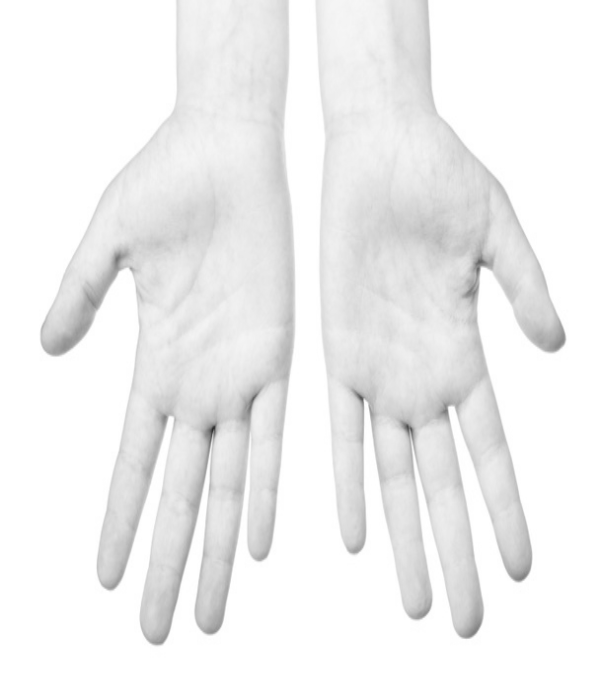

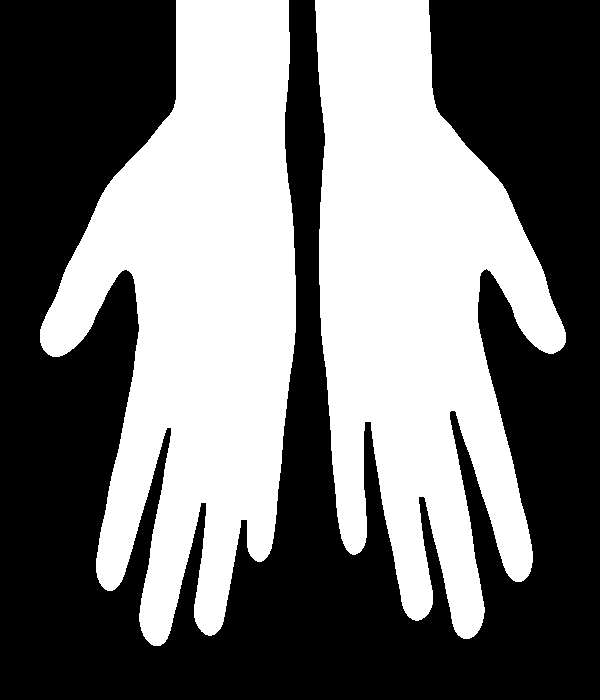

Number of contours: 2
Hierarchy:
 [[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]


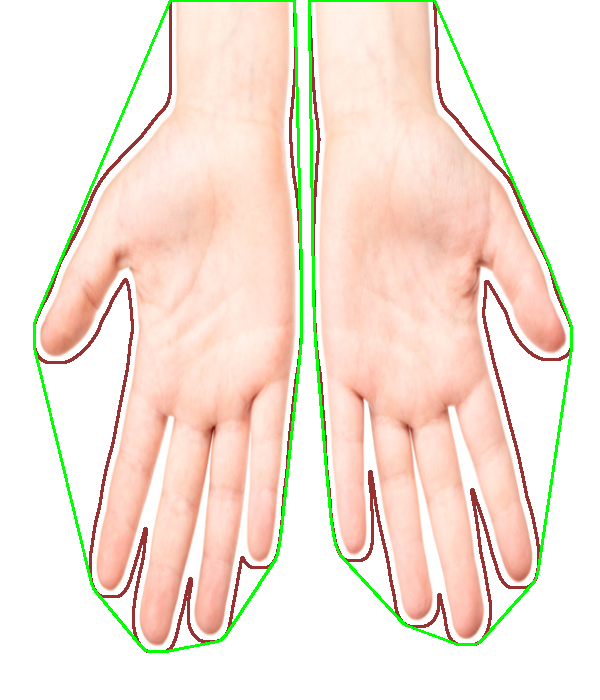

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # for displaying images in Colab

# Load image - update path if needed
img = cv2.imread("/content/hand1.jpeg")  # Change backslashes to forward slashes for compatibility

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found. Please check the path.")
else:
    # Resize the image
    img = cv2.resize(img, (600, 700))

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)  # Display the grayscale image

    # Apply a median blur
    blur = cv2.medianBlur(gray_img, 11)

    # Apply thresholding
    ret, thresh_img = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)
    cv2_imshow(thresh_img)  # Display the thresholded image

    # Dilate the image
    dilated_img = cv2.dilate(thresh_img, None, iterations=6)

    # Find contours
    cnts, hier = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print("Number of contours:", len(cnts))
    print("Hierarchy:\n", hier)

    # Loop over the contours
    for c in cnts:
        epsilon = 0.0001 * cv2.arcLength(c, True)
        data = cv2.approxPolyDP(c, epsilon, True)

        # Calculate convex hull
        hull = cv2.convexHull(data)

        # Draw original contour in blue and convex hull in green
        cv2.drawContours(img, [c], -1, (50, 50, 150), 2)
        cv2.drawContours(img, [hull], -1, (0, 255, 0), 2)

    # Display the final image with contours and convex hulls
    cv2_imshow(img)


# **find convexity defect**

**A convexity defect is a part of an object’s contour where the shape bends inward, away from its convex hull (the tight boundary that wraps around the shape). It’s the “dip” or “indent” between points on the object’s outline and the convex hull.**

Think of a hand:

**The convex hull** around a hand shape would look like an outline wrapping around the tips of the fingers.
    
**The convexity defects** are the spaces between the fingers, where the shape dips inward from the convex hull.

In a convexity defect, there are typically three main points:

**Start Point:** The point where the defect starts along the contour.
    
**End Point:**The point where the defect ends along the contour.
    
**Farthest Point:**The point within the defect that is farthest from the convex hull boundary. This is usually at the deepest part of the indentation.

Additionally, each defect also has a depth value, which is the distance between the farthest point and the convex hull. This depth can indicate how deep or pronounced each defect is.

In the example of a hand, for instance:

    
**The start and end points would be near the base of two fingers.**
    
**The farthest point would be somewhere between the fingers, closer to the palm.**

These points are often used in applications like hand gesture recognition, where identifying the spaces between fingers can help determine the shape or gesture.

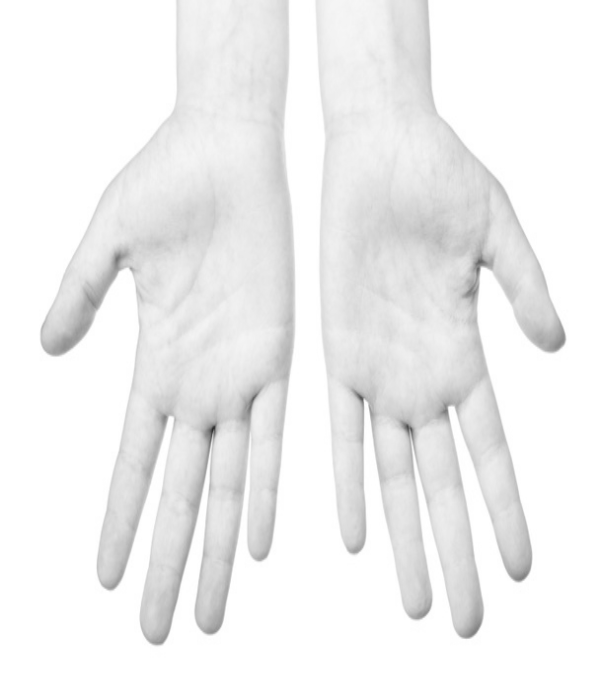

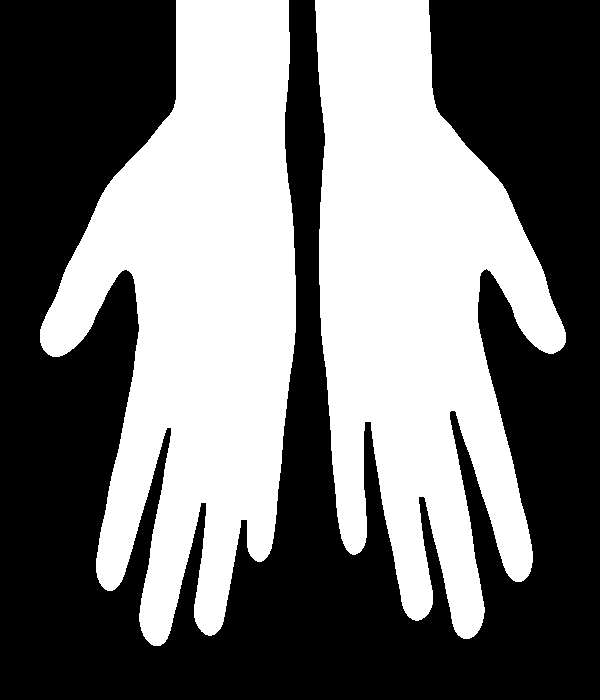

Number of contours: 2
Hierarchy:
 [[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]
Defect points - Start: (309, 16), End: (313, 290), Farthest: (319, 139), Depth: 2100
Defect points - Start: (313, 290), End: (314, 323), Farthest: (314, 291), Depth: 248
Defect points - Start: (314, 323), End: (315, 341), Farthest: (315, 324), Depth: 241
Defect points - Start: (315, 341), End: (326, 470), Farthest: (321, 383), Depth: 617
Defect points - Start: (326, 470), End: (330, 513), Farthest: (329, 489), Depth: 314
Defect points - Start: (330, 513), End: (331, 522), Farthest: (331, 514), Depth: 226
Defect points - Start: (331, 522), End: (333, 534), Farthest: (332, 523), Depth: 210
Defect points - Start: (333, 534), End: (335, 544), Farthest: (334, 535), Depth: 201
Defect points - Start: (335, 544), End: (337, 549), Farthest: (337, 547), Depth: 190
Defect points - Start: (337, 549), End: (340, 555), Farthest: (338, 550), Depth: 114
Defect points - Start: (340, 555), End: (401, 621), Farthest: (371, 472), Depth: 2

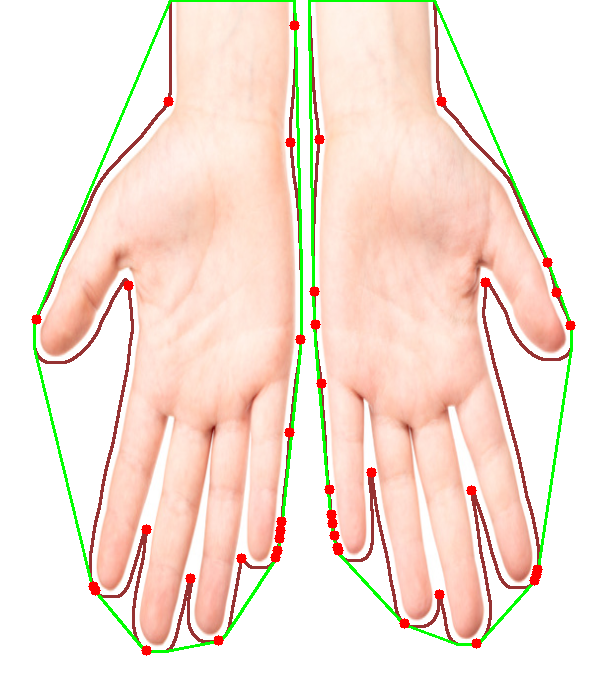

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # for displaying images in Colab

# Load image - update path if needed
img = cv2.imread("/content/hand1.jpeg")  # Change backslashes to forward slashes for compatibility

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found. Please check the path.")
else:
    # Resize the image
    img = cv2.resize(img, (600, 700))

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)  # Display the grayscale image

    # Apply a median blur
    blur = cv2.medianBlur(gray_img, 11)

    # Apply thresholding
    ret, thresh_img = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)
    cv2_imshow(thresh_img)  # Display the thresholded image

    # Dilate the image
    dilated_img = cv2.dilate(thresh_img, None, iterations=6)

    # Find contours
    cnts, hier = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print("Number of contours:", len(cnts))
    print("Hierarchy:\n", hier)

    # Loop over the contours
    for c in cnts:
        epsilon = 0.0001 * cv2.arcLength(c, True)
        data = cv2.approxPolyDP(c, epsilon, True)

        # Calculate convex hull
        hull = cv2.convexHull(data)
        hull2 = cv2.convexHull(c, returnPoints=False)

        # Draw original contour in blue and convex hull in green
        cv2.drawContours(img, [c], -1, (50, 50, 150), 2)
        cv2.drawContours(img, [hull], -1, (0, 255, 0), 2)

        # Calculate convexity defects
        defect = cv2.convexityDefects(c, hull2)

        # Draw convexity defects
        if defect is not None:
            for i in range(defect.shape[0]):
                s, e, f, d = defect[i, 0]
                start = tuple(c[s][0])
                end = tuple(c[e][0])
                far = tuple(c[f][0])

                # Draw line for visualization (optional, uncomment to display)
                # cv2.line(img, start, end, [255, 0, 0], 2)

                # Draw circle at farthest point
                cv2.circle(img, far, 5, [0, 0, 255], -1)  # Red circle for farthest points
                print(f"Defect points - Start: {start}, End: {end}, Farthest: {far}, Depth: {d}")

    # Display the final image with contours, convex hulls, and defects marked
    cv2_imshow(img)


# **Extreme points**

**Extreme points refer to the outermost points on an object's contour in an image. For a given shape or object, they are:**

**Leftmost Point:** The point with the smallest x-coordinate.

**Rightmost Point:**The point with the largest x-coordinate.

**Topmost Point:**The point with the smallest y-coordinate.

**Bottommost Point:** The point with the largest y-coordinate.

These points mark the boundaries of the object and can help in identifying its orientation, position, and size.

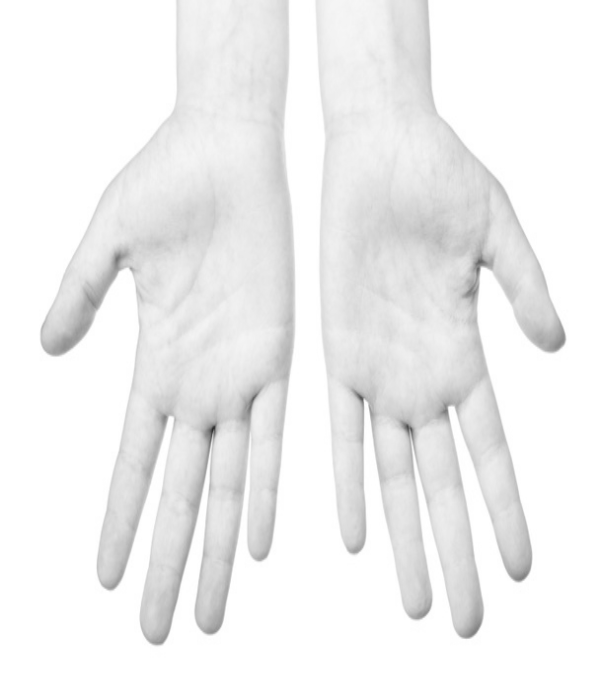

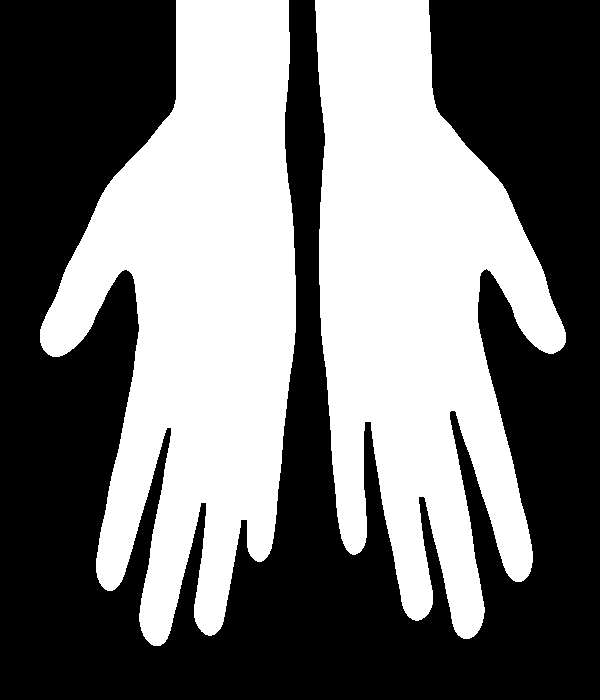

Number of contours: 2
Hand 1 extreme points:
Left: (34, 323), Right: (301, 338), Top: (170, 0), Bottom: (147, 651)
Hand 2 extreme points:
Left: (309, 0), Right: (571, 348), Top: (309, 0), Bottom: (457, 644)


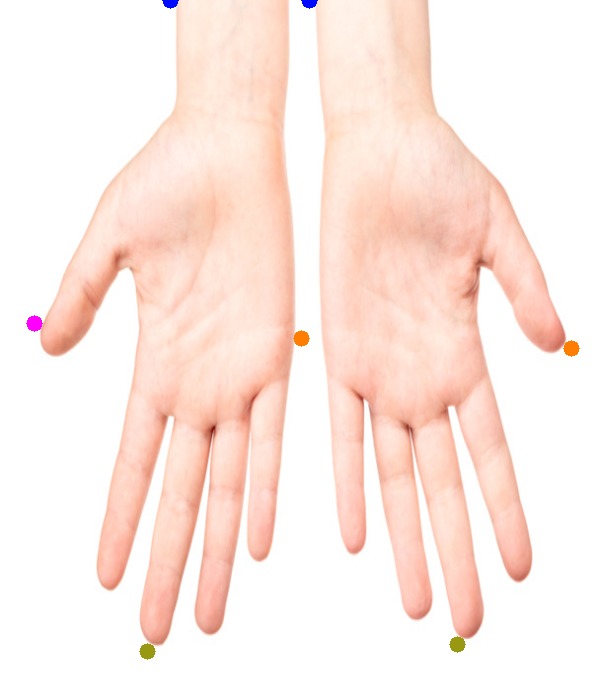

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # for displaying images in Colab

# Load image - update path if needed
img = cv2.imread("/content/hand1.jpeg")  # Change backslashes to forward slashes for compatibility

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found. Please check the path.")
else:
    # Resize the image
    img = cv2.resize(img, (600, 700))

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)  # Display the grayscale image

    # Apply a median blur
    blur = cv2.medianBlur(gray_img, 11)

    # Apply thresholding
    ret, thresh_img = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)
    cv2_imshow(thresh_img)  # Display the thresholded image

    # Dilate the image
    dilated_img = cv2.dilate(thresh_img, None, iterations=6)

    # Find contours
    cnts, hier = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print("Number of contours:", len(cnts))

    # Sort contours by area in descending order and take the two largest
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:2]

    # Loop through the two largest contours to detect extreme points
    for i, c_max in enumerate(cnts):
        # Determine the most extreme points along each contour
        # draw the outline of the object, then draw each of the
        # extreme points, where the left-most is red, right-most
        # is green, top-most is blue, and bottom-most is teal

        extLeft = tuple(c_max[c_max[:, :, 0].argmin()][0])
        extRight = tuple(c_max[c_max[:, :, 0].argmax()][0])
        extTop = tuple(c_max[c_max[:, :, 1].argmin()][0])
        extBot = tuple(c_max[c_max[:, :, 1].argmax()][0])

        # Draw circles at each extreme point with unique colors for each hand
        color = [(255, 0, 255), (0, 125, 255), (255, 10, 0), (19, 152, 152)]
        cv2.circle(img, extLeft, 8, color[0], -1)  # Pink for leftmost point
        cv2.circle(img, extRight, 8, color[1], -1) # Brown for rightmost point
        cv2.circle(img, extTop, 8, color[2], -1)   # Blue for topmost point
        cv2.circle(img, extBot, 8, color[3], -1)   # Green for bottommost point

        print(f"Hand {i + 1} extreme points:")
        print(f"Left: {extLeft}, Right: {extRight}, Top: {extTop}, Bottom: {extBot}")

    # Display the final image with extreme points on both hands
    cv2_imshow(img)  # Display the image with extreme points


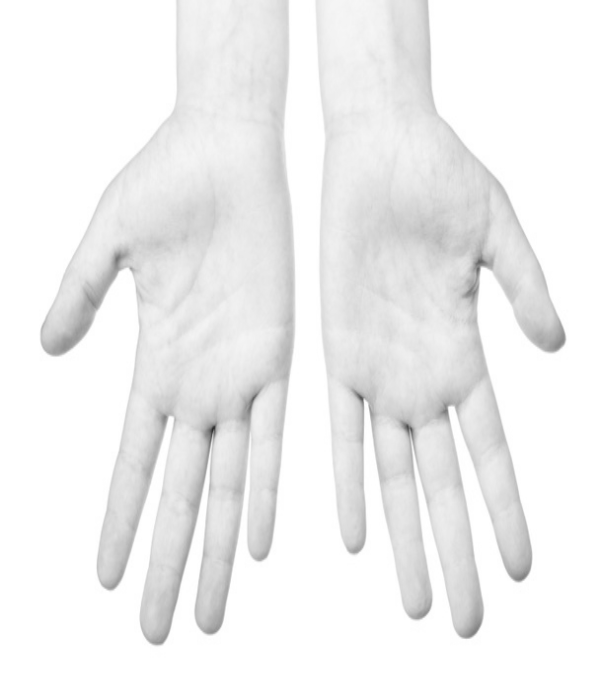

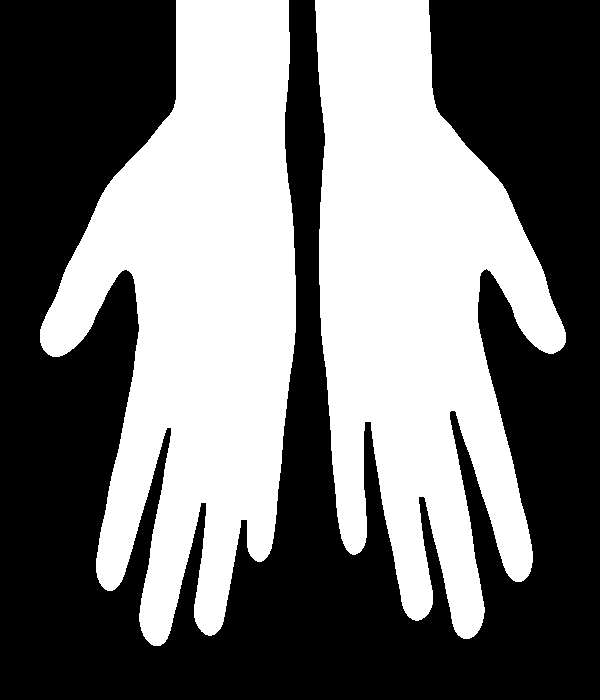

Number of contours: 2
Hand 1 extreme points:
Left: (34, 323), Right: (301, 338), Top: (170, 0), Bottom: (147, 651)
Defect points for Hand 1 - Start: (170, 0), End: (36, 317), Farthest: (168, 101), Depth: 9596
Defect points for Hand 1 - Start: (36, 317), End: (34, 323), Farthest: (36, 319), Depth: 162
Defect points for Hand 1 - Start: (34, 348), End: (91, 583), Farthest: (128, 285), Depth: 27188
Defect points for Hand 1 - Start: (91, 583), End: (93, 588), Farthest: (93, 586), Depth: 190
Defect points for Hand 1 - Start: (93, 588), End: (95, 591), Farthest: (95, 590), Depth: 142
Defect points for Hand 1 - Start: (95, 591), End: (139, 644), Farthest: (146, 529), Depth: 20184
Defect points for Hand 1 - Start: (145, 650), End: (147, 651), Farthest: (146, 650), Depth: 114
Defect points for Hand 1 - Start: (166, 651), End: (217, 641), Farthest: (190, 578), Depth: 17157
Defect points for Hand 1 - Start: (217, 641), End: (220, 640), Farthest: (218, 640), Depth: 162
Defect points for Hand 1 - St

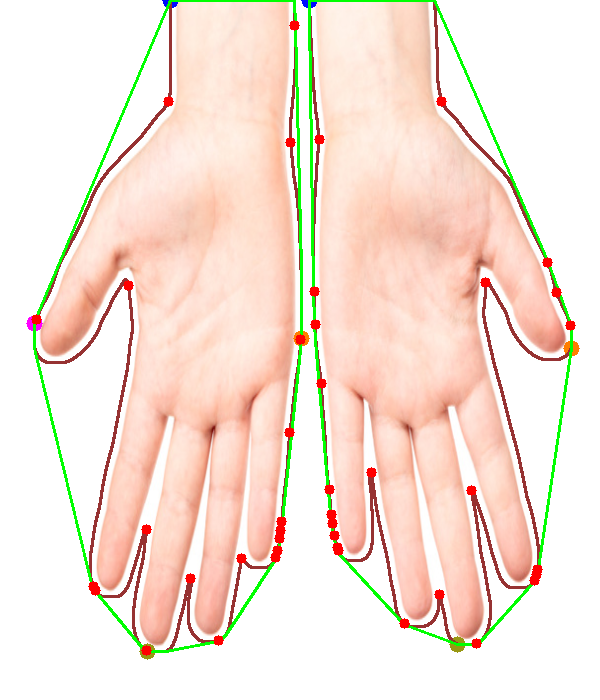

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # for displaying images in Colab

# Load image - update path if needed
img = cv2.imread("/content/hand1.jpeg")  # Change backslashes to forward slashes for compatibility

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found. Please check the path.")
else:
    # Resize the image
    img = cv2.resize(img, (600, 700))

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)  # Display the grayscale image

    # Apply a median blur
    blur = cv2.medianBlur(gray_img, 11)

    # Apply thresholding
    ret, thresh_img = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)
    cv2_imshow(thresh_img)  # Display the thresholded image

    # Dilate the image
    dilated_img = cv2.dilate(thresh_img, None, iterations=6)

    # Find contours
    cnts, hier = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print("Number of contours:", len(cnts))

    # Sort contours by area in descending order and take the two largest (assuming they are the two hands)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:2]

    # Loop through the two largest contours to detect extreme points and convexity defects
    for i, c_max in enumerate(cnts):
        # Determine the most extreme points along each contour
        extLeft = tuple(c_max[c_max[:, :, 0].argmin()][0])
        extRight = tuple(c_max[c_max[:, :, 0].argmax()][0])
        extTop = tuple(c_max[c_max[:, :, 1].argmin()][0])
        extBot = tuple(c_max[c_max[:, :, 1].argmax()][0])

        # Draw circles at each extreme point with unique colors for each hand
        color = [(255, 0, 255), (0, 125, 255), (255, 10, 0), (19, 152, 152)]
        cv2.circle(img, extLeft, 8, color[0], -1)  # Pink for leftmost point
        cv2.circle(img, extRight, 8, color[1], -1) # Brown for rightmost point
        cv2.circle(img, extTop, 8, color[2], -1)   # Blue for topmost point
        cv2.circle(img, extBot, 8, color[3], -1)   # Green for bottommost point

        print(f"Hand {i + 1} extreme points:")
        print(f"Left: {extLeft}, Right: {extRight}, Top: {extTop}, Bottom: {extBot}")

        # Calculate the convex hull and convexity defects for each contour
        epsilon = 0.0001 * cv2.arcLength(c_max, True)
        data = cv2.approxPolyDP(c_max, epsilon, True)

        # Calculate convex hull and convexity defects
        hull = cv2.convexHull(data)
        hull2 = cv2.convexHull(c_max, returnPoints=False)

        # Draw original contour in blue and convex hull in green
        cv2.drawContours(img, [c_max], -1, (50, 50, 150), 2)
        cv2.drawContours(img, [hull], -1, (0, 255, 0), 2)

        # Calculate and draw convexity defects
        defect = cv2.convexityDefects(c_max, hull2)

        if defect is not None:
            for j in range(defect.shape[0]):
                s, e, f, d = defect[j, 0]
                start = tuple(c_max[s][0])
                end = tuple(c_max[e][0])
                far = tuple(c_max[f][0])

                # Optional: draw line from start to end (uncomment to use)
                # cv2.line(img, start, end, [255, 0, 0], 2)

                # Draw circle at farthest point
                cv2.circle(img, far, 5, [0, 0, 255], -1)  # Red circle for farthest points
                print(f"Defect points for Hand {i + 1} - Start: {start}, End: {end}, Farthest: {far}, Depth: {d}")

    # Display the final image with contours, convex hulls, defects, and extreme points
    cv2_imshow(img)  # Display the image with extreme points
